# TITANIC SURVIVAL PREDICTION

## Import Dataset

In [1]:
import numpy as np 
import pandas as pd  
data=pd.read_csv("Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing 

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)  # Drop unnecessary columns
data.dropna(inplace=True)  # Drop rows with missing values


In [16]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [29]:
# Assuming 'data' is your DataFrame containing the Titanic dataset

# Map 'sex' column values to 1 for male and 0 for female
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})


In [30]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


## library import

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

## convert into female to 0 and male to 1

In [47]:
# Assuming 'data' is your DataFrame containing the Titanic dataset

# Map 'sex' column values to 1 for male and 0 for female
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

## Splitting the dataset into features and target variable

In [48]:
X = data.drop('Survived', axis=1)
y = data['Survived']

## Impute missing values

In [49]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

## Splitting the imputed dataset into training and testing sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## Train the model through logistic regression

In [51]:
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train, y_train)

LogisticRegression()

## Make predictions on the test set and Evaluate the model

In [52]:
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7430167597765364

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179


Confusion Matrix:
[[94 11]
 [35 39]]


### Classification Report:
Accuracy: The overall accuracy of the model is 74.3%. This means that 74.3% of the predictions made by the model are correct.

Precision: For class 0, precision is 0.73, and for class 1, precision is 0.78. This means that 73% of the passengers predicted to not survive actually did not survive, and 78% of the passengers predicted to survive actually survived.

Recall: For class 0, recall is 0.90, and for class 1, recall is 0.53. This means that the model correctly identified 90% of the passengers who did not survive, but only 53% of the passengers who did survive.

F1-score: For class 0, the F1-score is 0.80, and for class 1, the F1-score is 0.63. This provides a balance between precision and recall for each class.

Support: The support for class 0 is 105, and for class 1, it's 74. This indicates the number of instances of each class in the test set.

## Overall
 the model shows better performance in predicting passengers who did not survive (class 0) compared to those who did survive (class 1), as evident from higher precision, recall, and F1-score for class 0. However, there is room for improvement in correctly identifying passengers who survived.

## Result show in graph

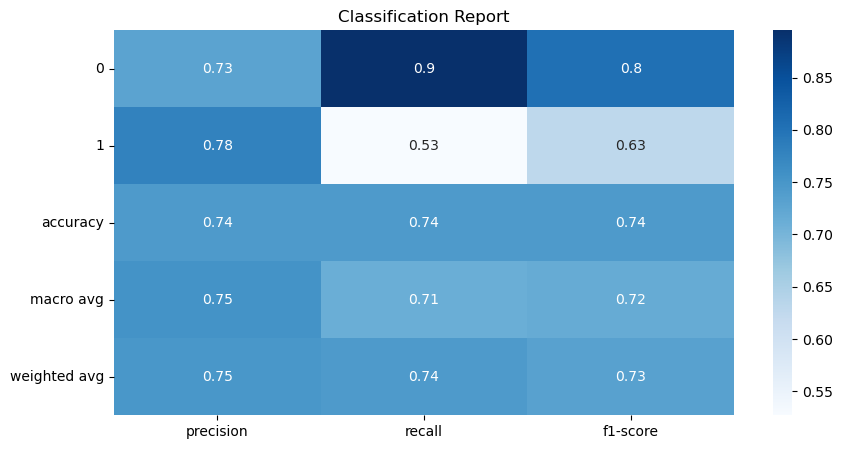

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(report_df.drop(columns=['support']).astype(float), annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

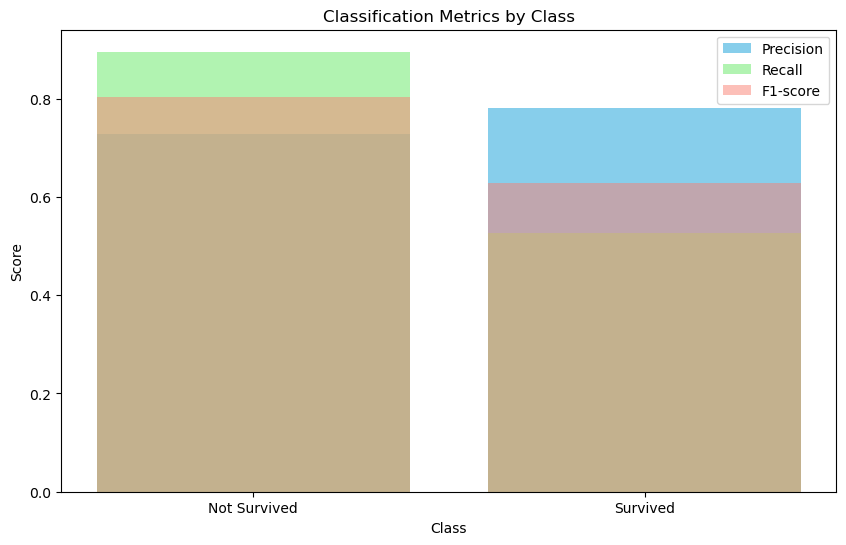

In [54]:
# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision = [report[str(i)]['precision'] for i in range(2)]
recall = [report[str(i)]['recall'] for i in range(2)]
f1_score = [report[str(i)]['f1-score'] for i in range(2)]
classes = ['Not Survived', 'Survived']

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(classes, precision, color='skyblue', label='Precision')
plt.bar(classes, recall, color='lightgreen', label='Recall', alpha=0.7)
plt.bar(classes, f1_score, color='salmon', label='F1-score', alpha=0.5)

plt.title('Classification Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.show()
